In [1]:
# install necessary packages
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("biomaRt")
install.packages("ranger")
install.packages('caret')
install.packages('DALEX')
install.packages('pROC')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'biomaRt'”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(caret)
library(DALEX)
library(pROC)
library(biomaRt)

Loading required package: ggplot2

Loading required package: lattice

Welcome to DALEX (version: 2.4.3).
Find examples and detailed introduction at: http://ema.drwhy.ai/
Additional features will be available after installation of: ggpubr.
Use 'install_dependencies()' to get all suggested dependencies

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [3]:
COAD_norm_dataset <- read.csv("https://raw.githubusercontent.com/mahiiC/HackBio_Internship_2024/refs/heads/main/Stage_3%20Task/COAD_Log2Normalized_matrix.csv", row.names = 1)
head(COAD_norm_dataset)

,TCGA.AA.3662.11A.01R.1723.07,TCGA.AA.3531.11A.01R.A32Z.07,TCGA.AZ.6603.11A.02R.1839.07,TCGA.AZ.6599.11A.01R.1774.07,TCGA.AA.3655.11A.01R.1723.07,TCGA.A6.5665.11A.01R.1653.07,TCGA.A6.2686.11A.01R.A32Z.07,TCGA.A6.5659.11A.01R.1653.07,TCGA.A6.2684.11A.01R.A32Z.07,TCGA.AZ.6598.11A.01R.1774.07,⋯,TCGA.F4.6703.01A.11R.1839.07,TCGA.AD.6965.01A.11R.1928.07,TCGA.A6.6781.01B.06R.A277.07,TCGA.AA.A029.01A.01R.A00A.07,TCGA.AA.3510.01A.01R.1410.07,TCGA.AY.A71X.01A.12R.A37K.07,TCGA.CM.5341.01A.01R.1410.07,TCGA.F4.6809.01A.11R.1839.07,TCGA.A6.2678.01A.01R.0821.07,TCGA.A6.6653.01A.11R.1774.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,12.887411,12.755722,11.764457,12.929998,12.837037,11.843529,12.182394,11.644307,12.381273,12.580023,⋯,11.212496,12.918677,10.304922,9.677720,11.460968,12.561765,13.155134,12.827740,11.997532,11.432542
ENSG00000000005,5.087463,5.209453,5.044394,4.000000,4.954196,5.392317,5.781360,5.321928,5.491853,5.954196,⋯,7.794416,6.209453,2.321928,3.459432,1.000000,5.700440,4.523562,8.082149,5.285402,2.584963
ENSG00000000419,10.274960,10.681238,10.101976,10.193525,10.721099,9.961450,10.676839,9.703904,10.221587,10.302639,⋯,10.779719,11.329796,9.705632,8.647458,9.238405,10.775610,11.652845,11.836839,10.623881,9.584963
ENSG00000000457,9.764872,9.958553,8.980140,9.306062,9.562242,9.390169,9.954196,8.573647,9.544964,9.375039,⋯,9.905387,9.233620,9.129283,6.894818,7.800900,9.709084,8.991522,9.517669,9.290019,8.022368
ENSG00000000460,7.055282,7.409391,7.499846,8.005625,7.539159,6.727920,8.169925,6.108524,7.149747,7.930737,⋯,8.820179,8.308339,8.700440,6.321928,7.426265,8.584963,8.108524,8.330917,8.787903,8.285402
ENSG00000000938,8.228819,8.672425,9.417853,7.948367,7.870365,7.426265,8.335390,7.087463,7.787903,8.682995,⋯,11.648807,6.754888,9.517669,4.000000,7.918863,5.672425,8.233620,9.019591,7.442943,7.629357


In [4]:
COAD_metadata <- read.csv("https://raw.githubusercontent.com/mahiiC/HackBio_Internship_2024/refs/heads/main/Stage_3%20Task/COAD_Metadata.csv", row.names = 1)
head(COAD_norm_dataset)

,TCGA.AA.3662.11A.01R.1723.07,TCGA.AA.3531.11A.01R.A32Z.07,TCGA.AZ.6603.11A.02R.1839.07,TCGA.AZ.6599.11A.01R.1774.07,TCGA.AA.3655.11A.01R.1723.07,TCGA.A6.5665.11A.01R.1653.07,TCGA.A6.2686.11A.01R.A32Z.07,TCGA.A6.5659.11A.01R.1653.07,TCGA.A6.2684.11A.01R.A32Z.07,TCGA.AZ.6598.11A.01R.1774.07,⋯,TCGA.F4.6703.01A.11R.1839.07,TCGA.AD.6965.01A.11R.1928.07,TCGA.A6.6781.01B.06R.A277.07,TCGA.AA.A029.01A.01R.A00A.07,TCGA.AA.3510.01A.01R.1410.07,TCGA.AY.A71X.01A.12R.A37K.07,TCGA.CM.5341.01A.01R.1410.07,TCGA.F4.6809.01A.11R.1839.07,TCGA.A6.2678.01A.01R.0821.07,TCGA.A6.6653.01A.11R.1774.07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,12.887411,12.755722,11.764457,12.929998,12.837037,11.843529,12.182394,11.644307,12.381273,12.580023,⋯,11.212496,12.918677,10.304922,9.677720,11.460968,12.561765,13.155134,12.827740,11.997532,11.432542
ENSG00000000005,5.087463,5.209453,5.044394,4.000000,4.954196,5.392317,5.781360,5.321928,5.491853,5.954196,⋯,7.794416,6.209453,2.321928,3.459432,1.000000,5.700440,4.523562,8.082149,5.285402,2.584963
ENSG00000000419,10.274960,10.681238,10.101976,10.193525,10.721099,9.961450,10.676839,9.703904,10.221587,10.302639,⋯,10.779719,11.329796,9.705632,8.647458,9.238405,10.775610,11.652845,11.836839,10.623881,9.584963
ENSG00000000457,9.764872,9.958553,8.980140,9.306062,9.562242,9.390169,9.954196,8.573647,9.544964,9.375039,⋯,9.905387,9.233620,9.129283,6.894818,7.800900,9.709084,8.991522,9.517669,9.290019,8.022368
ENSG00000000460,7.055282,7.409391,7.499846,8.005625,7.539159,6.727920,8.169925,6.108524,7.149747,7.930737,⋯,8.820179,8.308339,8.700440,6.321928,7.426265,8.584963,8.108524,8.330917,8.787903,8.285402
ENSG00000000938,8.228819,8.672425,9.417853,7.948367,7.870365,7.426265,8.335390,7.087463,7.787903,8.682995,⋯,11.648807,6.754888,9.517669,4.000000,7.918863,5.672425,8.233620,9.019591,7.442943,7.629357


In [5]:
# Making sure the column names in TCGA_COAD_dataset matches the rownames in TCGA_COAD_metadata
all(colnames(COAD_norm_dataset) %in% rownames(COAD_metadata))

[1] TRUE

In [6]:
# Making sure the column names in TCGA_COAD_dataset are in the same order as the rownames in TCGA_COAD_metadata
all(colnames(COAD_norm_dataset) == rownames(COAD_metadata))

[1] TRUE

In [7]:
set.seed(12345)

In [8]:
table(COAD_metadata$sample_type)


      Primary Tumor Solid Tissue Normal 
                 20                  20 

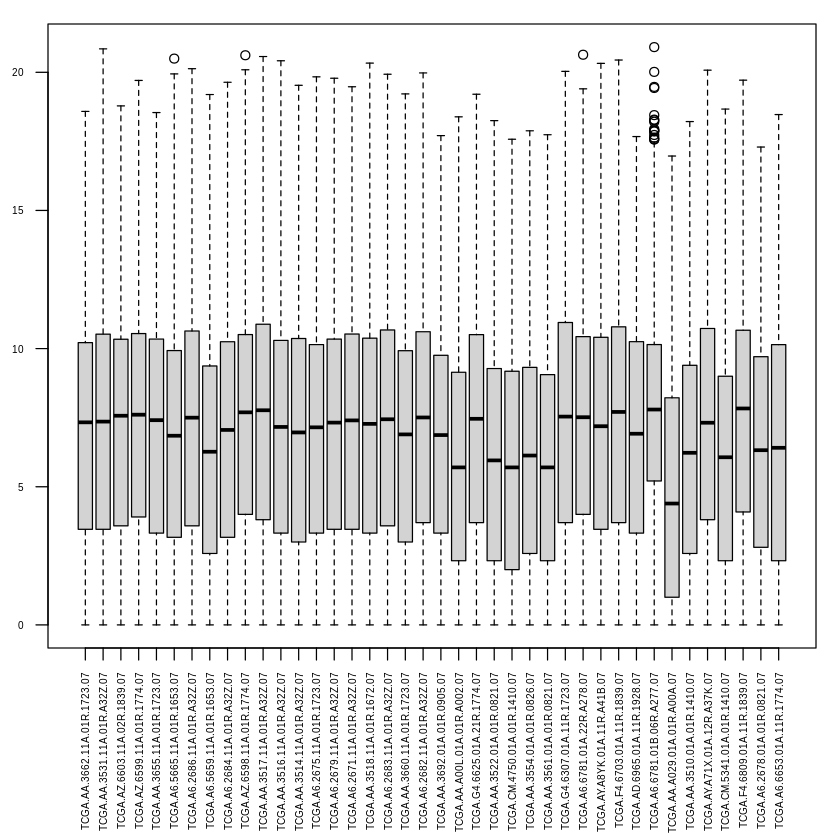

In [9]:
#preview filtered normalized data
par(mar = c(8,2,1,1))
boxplot(COAD_norm_dataset, las = 2, cex.axis = 0.5)

### **Data Preprocessing for ML**

In [10]:
# selecting the top 1000 variable genes
data_trans <- data.frame(t(COAD_norm_dataset))
sds <- apply(data_trans, 2, sd) #standard deviation
top_preds <- order(sds, decreasing = T)[1:8000]
data_trans <- data_trans[, top_preds]
dim(data_trans)

[1]   40 8000

In [11]:
head(data_trans)

,ENSG00000103375,ENSG00000183034,ENSG00000133742,ENSG00000071203,ENSG00000182271,ENSG00000174992,ENSG00000129824,ENSG00000197888,ENSG00000016602,ENSG00000067048,⋯,ENSG00000227295,ENSG00000285572,ENSG00000188460,ENSG00000280927,ENSG00000254750,ENSG00000225342,ENSG00000228264,ENSG00000207751,ENSG00000275155,ENSG00000288032
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA.AA.3662.11A.01R.1723.07,12.854089,10.975848,16.92844,13.20915,11.65642,16.80979,3.584963,13.51237,12.51002,1.000000,⋯,3.906891,2.807355,1.584963,4.954196,1.584963,3.584963,1.000000,0.000000,3.169925,0.000000
TCGA.AA.3531.11A.01R.A32Z.07,16.962162,14.114312,16.93964,14.29992,14.09267,16.72263,4.000000,15.47352,17.43851,2.321928,⋯,4.906891,2.584963,4.321928,5.285402,1.584963,3.584963,1.584963,0.000000,2.807355,0.000000
TCGA.AZ.6603.11A.02R.1839.07,5.491853,8.011227,10.45327,12.02652,8.98014,14.02185,2.584963,12.52013,13.20472,0.000000,⋯,3.584963,3.807355,3.584963,5.459432,4.000000,4.584963,0.000000,0.000000,3.169925,1.584963
TCGA.AZ.6599.11A.01R.1774.07,11.864960,10.893302,14.84794,11.58214,11.52013,15.93238,12.782589,16.10364,15.68702,11.209453,⋯,3.169925,3.906891,4.321928,6.247928,0.000000,3.700440,2.321928,1.584963,3.169925,0.000000
TCGA.AA.3655.11A.01R.1723.07,14.265249,11.318543,17.01345,14.16554,12.84882,17.18153,13.535518,2.00000,13.48457,10.618386,⋯,3.700440,0.000000,1.584963,5.087463,3.459432,3.584963,0.000000,0.000000,2.321928,0.000000
TCGA.A6.5665.11A.01R.1653.07,17.707089,13.068946,16.58915,15.02523,12.87479,15.22147,3.906891,14.09992,16.99093,3.321928,⋯,2.000000,3.000000,3.000000,6.228819,2.000000,2.000000,2.000000,0.000000,2.321928,0.000000


In [12]:
data_trans <- merge(data_trans, COAD_metadata, by = "row.names", sort = FALSE)
dim(data_trans)

[1]   40 8002

In [13]:
rownames(data_trans) <- data_trans$Row.names
data_trans <- data_trans[,-1]
head(data_trans)

,ENSG00000103375,ENSG00000183034,ENSG00000133742,ENSG00000071203,ENSG00000182271,ENSG00000174992,ENSG00000129824,ENSG00000197888,ENSG00000016602,ENSG00000067048,⋯,ENSG00000285572,ENSG00000188460,ENSG00000280927,ENSG00000254750,ENSG00000225342,ENSG00000228264,ENSG00000207751,ENSG00000275155,ENSG00000288032,sample_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
TCGA.AA.3662.11A.01R.1723.07,12.854089,10.975848,16.92844,13.20915,11.65642,16.80979,3.584963,13.51237,12.51002,1.000000,⋯,2.807355,1.584963,4.954196,1.584963,3.584963,1.000000,0.000000,3.169925,0.000000,Solid Tissue Normal
TCGA.AA.3531.11A.01R.A32Z.07,16.962162,14.114312,16.93964,14.29992,14.09267,16.72263,4.000000,15.47352,17.43851,2.321928,⋯,2.584963,4.321928,5.285402,1.584963,3.584963,1.584963,0.000000,2.807355,0.000000,Solid Tissue Normal
TCGA.AZ.6603.11A.02R.1839.07,5.491853,8.011227,10.45327,12.02652,8.98014,14.02185,2.584963,12.52013,13.20472,0.000000,⋯,3.807355,3.584963,5.459432,4.000000,4.584963,0.000000,0.000000,3.169925,1.584963,Solid Tissue Normal
TCGA.AZ.6599.11A.01R.1774.07,11.864960,10.893302,14.84794,11.58214,11.52013,15.93238,12.782589,16.10364,15.68702,11.209453,⋯,3.906891,4.321928,6.247928,0.000000,3.700440,2.321928,1.584963,3.169925,0.000000,Solid Tissue Normal
TCGA.AA.3655.11A.01R.1723.07,14.265249,11.318543,17.01345,14.16554,12.84882,17.18153,13.535518,2.00000,13.48457,10.618386,⋯,0.000000,1.584963,5.087463,3.459432,3.584963,0.000000,0.000000,2.321928,0.000000,Solid Tissue Normal
TCGA.A6.5665.11A.01R.1653.07,17.707089,13.068946,16.58915,15.02523,12.87479,15.22147,3.906891,14.09992,16.99093,3.321928,⋯,3.000000,3.000000,6.228819,2.000000,2.000000,2.000000,0.000000,2.321928,0.000000,Solid Tissue Normal


In [14]:
# Removing genes with Near Zero Variation (NZV)
data_zero <- preProcess(data_trans, method = "nzv", uniqueCut = 15)
data_trans <- predict(data_zero, data_trans)

In [15]:
dim(data_trans)

[1]   40 7991

In [16]:
# Center the data
data_center <- preProcess(data_trans, method = "center")
data_trans <- predict(data_center, data_trans)
dim(data_trans)

[1]   40 7991

In [17]:
# remove highly correlated data
data_corr <- preProcess(data_trans, method = "corr", cutoff = 0.52)
data_trans <- predict(data_corr, data_trans)
dim(data_trans)

[1]  40 166

### **Splitting dataset into training and test datasets**

In [18]:
# splitting the dataset in the ratio 80:20
intrain <- createDataPartition(y = data_trans$sample_type, p = 0.7)[[1]]
train_data <- data_trans[intrain,]
test_data <- data_trans[-intrain,]
dim(train_data)
dim(test_data)

[1]  28 166

[1]  12 166

### **Training the Machine Learning Model on the Training dataset**

In [19]:
# to prevent any bias; done by the cross validation method
control.bias <- trainControl(method = "cv", number = 7)

In [20]:
#training the model
rf.output <- train(sample_type~.,
                  data = train_data,
                  method = "ranger",
                  trControl = control.bias,
                  importance = "permutation",
                  tuneGrid = data.frame(mtry = 100,
                                        min.node.size = 1,
                                        splitrule = "gini"))

In [21]:
rf.output$finalModel$prediction.error

[1] 0.2142857

In [22]:
#Extract the top 10 important genes for functional enrichment analysis
# Calculate variable importance
importance_rf <- varImp(rf.output)

# Get the top 10 genes
importance_df <- data.frame(gene = rownames(importance_rf$importance),
                           importance = importance_rf$importance)

# Order by importance and select top 10 genes
top_10_genes <- head(importance_df[order(importance_df$Overall, decreasing = TRUE), ], 10)
top_10 <- as.data.frame(rownames(top_10_genes))
top_10


rownames(top_10_genes)
<chr>
ENSG00000282122
ENSG00000134184
ENSG00000109158
ENSG00000164093
ENSG00000158477
ENSG00000261613
ENSG00000242516
ENSG00000189343
ENSG00000242173


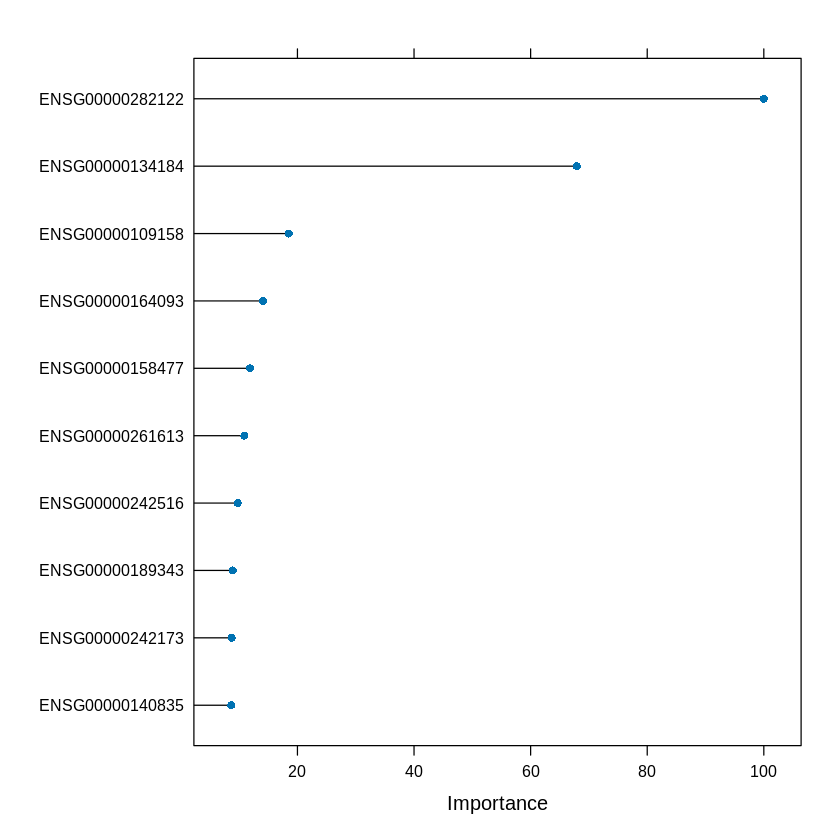

In [23]:
plot(importance_rf, top = 10)

In [24]:
#extract gene names using biomaRt package and saving it in a csv file
mart <- useMart("ensembl",  dataset = "hsapiens_gene_ensembl")
top_10_gene_names <- getBM(attributes = c("ensembl_gene_id", "hgnc_symbol"),
                   filters = "ensembl_gene_id",
                   values = top_10_genes,
                   mart = mart)$hgnc_symbol

In [25]:
write.csv(top_10_gene_names,"top10_ML_gene_names.csv")

In [26]:
# predicting on test data
rf.predictions <- predict(rf.output, test_data)

In [27]:
# Convert rf.predictions and test_data$sample_type to factors with the same levels
rf.predictions <- as.factor(rf.predictions)
test_data$sample_type <- as.factor(test_data$sample_type)

# Set the levels of rf.predictions to be the same as test_data$sample_type
levels(rf.predictions) <- levels(test_data$sample_type)

In [28]:
confusionMatrix(rf.predictions, test_data$sample_type)

Confusion Matrix and Statistics

                     Reference
Prediction            Primary Tumor Solid Tissue Normal
  Primary Tumor                   3                   0
  Solid Tissue Normal             3                   6
                                          
               Accuracy : 0.75            
                 95% CI : (0.4281, 0.9451)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 0.0730          
                                          
                  Kappa : 0.5             
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 0.5000          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.6667          
             Prevalence : 0.5000          
         Detection Rate : 0.2500          
   Detection Prevalence : 0.2500          
      Balanced Accuracy : 0.7500     